<a href="https://www.kaggle.com/code/sc0v1n0/deap-learning-knapsack-low-dimensional-0-1?scriptVersionId=207179904" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

-----

# Setting Environment

In [1]:
%pip install deap -q

Note: you may need to restart the kernel to use updated packages.


-------------

# Load Data

**Resources**:

- [Instances of 0/1 Knapsack Problem](http://artemisa.unicauca.edu.co/~johnyortega/instances_01_KP/)
- [David Pisinger's optimization codes - Generator dataset](http://hjemmesider.diku.dk/~pisinger/codes.html)

In [2]:
import os

os.listdir('/kaggle/input')

['low_dimensional']

In [3]:
import pandas as pd

ds = pd.read_csv('/kaggle/input/low_dimensional/f2_l_d_kp_20_878.csv')
ds

,value,weight
0,20,878
1,44,92
2,46,4
3,90,43
4,72,83
5,91,84
6,40,68
7,75,92
8,35,82
9,8,6


In [4]:
ds.shape

(21, 2)

------

# Development

In [5]:
capacity: int = 878
optimzal_solution: int = 1024

In [6]:
import random
import numpy
from deap import base
from deap import creator
from deap import algorithms
from deap import tools

In [7]:
def fitness_function(solution):
    fitness: int = 0
    sum_capacity: int = 0
    for i in range(len(solution)):
        if solution[i] == 1:
            fitness += ds['value'][i]
            sum_capacity += ds['weight'][i]
    if sum_capacity > capacity:
        fitness: int = 0
    return (fitness, )

-----

# First Test

In [8]:
toolbox = base.Toolbox()

creator.create("Maximization", base.Fitness, weights=(1.0,))
creator.create("Cromossomo", list, fitness=creator.Maximization)

toolbox.register("atributo", random.randint,0,1)
toolbox.register("solucaoFinal", tools.initRepeat, creator.Cromossomo, toolbox.atributo, n=len(ds['value']))
toolbox.register("Populacao", tools.initRepeat, list, toolbox.solucaoFinal)

toolbox.register("evaluate", fitness_function)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

In [9]:
pop = toolbox.Populacao(n=100)
prob_cx= 0.8
prob_mt= 0.1
nger = 500
hof = tools.HallOfFame(10)

st = tools.Statistics(key=lambda ind: ind.fitness.values)
st.register("Max", numpy.max)
st.register("Avg", numpy.mean)

In [10]:
finalPop, log = algorithms.eaSimple(pop, toolbox, prob_cx, prob_mt, nger, st, hof, verbose=True)

gen	nevals	Max	Avg   
0  	100   	789	284.39
1  	84    	808	549.46
2  	81    	879	636.87
3  	84    	984	703.77
4  	88    	990	722.85
5  	91    	990	782.36
6  	83    	1024	831.8 
7  	89    	1024	878.8 
8  	80    	1024	927.45
9  	74    	1024	936.94
10 	83    	1024	973.45
11 	75    	1024	954.01
12 	75    	1024	1002.27
13 	82    	1024	1005.11
14 	86    	1024	999.04 
15 	81    	1024	1005.87
16 	79    	1024	978.3  
17 	86    	1024	1021.65
18 	79    	1024	1011.76
19 	78    	1024	1014.49
20 	83    	1024	989.84 
21 	80    	1024	1002.16
22 	73    	1024	1012.92
23 	91    	1024	1021.37
24 	84    	1024	1006.46
25 	72    	1024	1011.26
26 	92    	1024	1011.16
27 	81    	1024	1010   
28 	89    	1024	1008.98
29 	83    	1024	1001.11
30 	88    	1024	996.81 
31 	75    	1024	997.81 
32 	79    	1024	1012.01
33 	72    	1024	1016.37
34 	83    	1024	1020.35
35 	74    	1024	1006.6 
36 	86    	1024	1019.34
37 	93    	1024	989.7  
38 	84    	1024	998.39 
39 	87    	1024	1000.26
40 	77    	1024	1008.45
41 	83    	1

In [11]:
best_solution = tools.selBest(finalPop, 5)
for ind in best_solution:
  print(f'{ind} - {ind.fitness.values}')

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1] - (1024.0,)
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1] - (1024.0,)
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1] - (1024.0,)
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1] - (1024.0,)
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1] - (1024.0,)


In [12]:
for best in hof:
  print(f'{best} - {best.fitness.values}')

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1] - (1024.0,)
[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1] - (1018.0,)
[0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1] - (1016.0,)
[0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1] - (1013.0,)
[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1] - (1009.0,)
[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1] - (1004.0,)
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1] - (999.0,)
[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1] - (997.0,)
[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1] - (995.0,)
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0] - (990.0,)


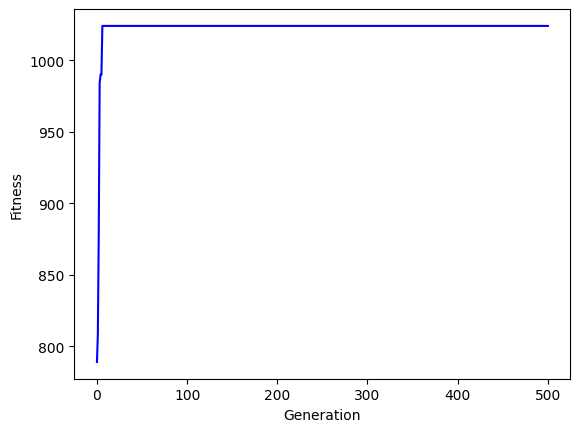

In [13]:
import matplotlib.pyplot as plt

maxFit, meanFit = log.select("Max", "Avg")

plt.plot(maxFit, color='blue')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.show()

-----

# Second Test

In [14]:
import pandas as pd

ds = pd.read_csv('/kaggle/input/low_dimensional/f10_l_d_kp_20_879.csv')
ds

,value,weight
0,20,879
1,91,84
2,72,83
3,90,43
4,46,4
5,55,44
6,8,6
7,35,82
8,75,92
9,61,25


In [15]:
toolbox = base.Toolbox()

creator.create("Maximization", base.Fitness, weights=(1.0,))
creator.create("Cromossomo", list, fitness=creator.Maximization)

toolbox.register("atributo", random.randint,0,1)
toolbox.register("solucaoFinal", tools.initRepeat, creator.Cromossomo, toolbox.atributo, n=len(ds['value']))
toolbox.register("Populacao", tools.initRepeat, list, toolbox.solucaoFinal)

toolbox.register("evaluate", fitness_function)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

/opt/conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Maximization' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/opt/conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Cromossomo' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [16]:
pop = toolbox.Populacao(n=100)
prob_cx= 0.8
prob_mt= 0.1
nger = 500
hof = tools.HallOfFame(10)

st = tools.Statistics(key=lambda ind: ind.fitness.values)
st.register("Max", numpy.max)
st.register("Avg", numpy.mean)

In [17]:
finalPop, log = algorithms.eaSimple(pop, toolbox, prob_cx, prob_mt, nger, st, hof, verbose=True)

gen	nevals	Max	Avg   
0  	100   	791	309.28
1  	84    	791	514.53
2  	85    	796	630.84
3  	78    	837	684.47
4  	80    	904	741.57
5  	95    	979	762.96
6  	82    	991	795.9 
7  	89    	996	860.32
8  	88    	1014	797.39
9  	83    	1025	817.13
10 	80    	1014	868.22
11 	74    	1019	887.61
12 	84    	1019	822.29
13 	84    	1019	905.56
14 	82    	1019	984   
15 	79    	1019	960.28
16 	85    	1019	968.09
17 	81    	1019	883.53
18 	83    	1019	926.24
19 	81    	1019	907.77
20 	72    	1019	950.02
21 	80    	1019	991.46
22 	82    	1019	1015.75
23 	81    	1019	1005.62
24 	80    	1019	1000.55
25 	73    	1019	1003.66
26 	84    	1019	1007.18
27 	79    	1019	991.61 
28 	80    	1019	1014.19
29 	83    	1019	1009.97
30 	77    	1019	1015.88
31 	78    	1019	997.53 
32 	73    	1019	1016.36
33 	96    	1019	1014.42
34 	90    	1019	997.56 
35 	94    	1019	1006.15
36 	70    	1019	1012   
37 	72    	1019	1005.43
38 	88    	1019	998.87 
39 	79    	1019	1016.64
40 	88    	1019	1005.04
41 	88    	1019	1018.37


In [18]:
best_solution = tools.selBest(finalPop, 5)
for ind in best_solution:
  print(f'{ind} - {ind.fitness.values}')

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1] - (1025.0,)
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1] - (1025.0,)
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1] - (1025.0,)
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1] - (1025.0,)
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1] - (1025.0,)


In [19]:
for best in hof:
  print(f'{best} - {best.fitness.values}')

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1] - (1025.0,)
[0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1] - (1019.0,)
[0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1] - (1017.0,)
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1] - (1014.0,)
[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1] - (1011.0,)
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0] - (1010.0,)
[0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1] - (1006.0,)
[0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1] - (1005.0,)
[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1] - (999.0,)
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0] - (998.0,)


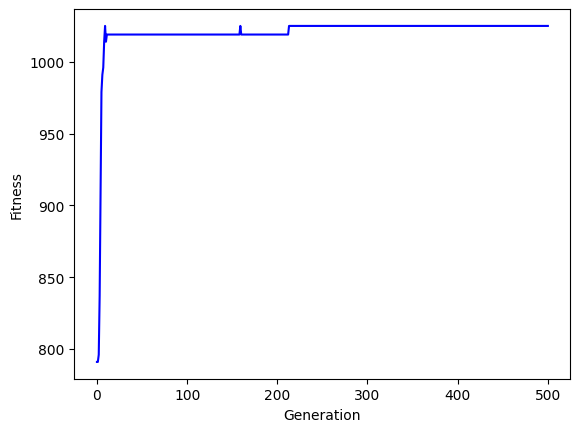

In [20]:
import matplotlib.pyplot as plt

maxFit, meanFit = log.select("Max", "Avg")

plt.plot(maxFit, color='blue')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.show()